## Vehicle Silhouettes

### Objective

To classify a given silhouette as one of four types of vehicle, 	using a set of features extracted from the silhouette. The 	vehicle may be viewed from one of many different angles.   

### Description

#### The features were extracted from the silhouettes by the HIPS
(Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising	both classical moments based measures such as scaled variance,	skewness and kurtosis about the major/minor axes and heuristic	measures such as hollows, circularity, rectangularity and	compactness. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400.	This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
	
#### Source: https://www.kaggle.com/rajansharma780/vehicle

## ATTRIBUTES
1.	compactness	float	average perimeter**2/area
2.	circularity	float	average radius**2/area
3.	distance_circularity	float	area/(av.distance from border)**2
4.	radius_ratio	float	(max.rad-min.rad)/av.radius
5.	pr_axis_aspect_ratio	float	(minor axis)/(major axis)
6.	max_length_aspect_ratio	float	(length perp. max length)/(max length)
7.	scatter_ratio	float	(inertia about minor axis)/(inertia about major axis)
8.	elongatedness	float	area/(shrink width)**2
9.	pr_axis_rectangularity	float	area/(pr.axis length*pr.axis width)
10.	max_length_rectangularity	float	area/(max.length*length perp. to this)
11.	scaled_variance_major_axis	float	(2nd order moment about minor axis)/area
12.	scaled_variance_minor_axis	float	(2nd order moment about major axis)/area
13.	scaled_radius_gyration	float	(mavar+mivar)/area
14.	skewness_major_axis	float	(3rd order moment about major axis)/sigma_min**3
15.	skewness_minor_axis	float	(3rd order moment about minor axis)/sigma_maj**3
16.	kurtosis_minor_axis	float	(4th order moment about major axis)/sigma_min**4
17.	kurtosis_major_axis	float	(4th order moment about minor axis)/sigma_maj**4
18.	hollows_ratio	float	(area of hollows)/(area of bounding polygon)

### Target variable
19.	vehicle_class	string	Predictor Class. Values: Opel, Saab, Bus, Van	

### Tasks:
1.	Obtain the multi-class dataset from the given link
2.	Load the dataset
3.	Apply pre-processing techniques: Encoding, Scaling
4.	Divide the dataset into training (70%) and testing (30%)
5.	Build your own random forest model from scratch (using invidual decision tree model from sklearn)
6.	Train the random forest model
7.	Test the random forest model
8.	Train and test the random forest model using sklearn.
9.	Compare the performance of both the models

### Useful links:
https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://www.analyticsvidhya.com/blog/2018/12/building-a-random-forest-from-scratch-understanding-real-world-data-products-ml-for-programmers-part-3/

# Part 1: Random Forest from scratch

Random forests are an ensemble learning method for classification and regression that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load the dataset 
data = pd.read_csv("vehicle.csv")
data.head(15)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3]:
print(data.shape)
data.describe()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
from sklearn import preprocessing
data = data.fillna(data.mean())
LE = preprocessing.LabelEncoder()
data['class'] = LE.fit_transform(data['class'])
data.head(15)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.000000,83.0,178.000000,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.000000,84.0,141.000000,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.000000,106.0,209.000000,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.000000,82.0,159.000000,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.000000,70.0,205.000000,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
5,107,44.828775,106.0,172.000000,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0
6,97,43.000000,73.0,173.000000,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0
7,90,43.000000,66.0,157.000000,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,2
8,86,34.000000,62.0,140.000000,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,2
9,93,44.000000,98.0,168.888095,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,2
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,2
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,1
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,2
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0


In [7]:
# Divide the dataset to training and testing set
from sklearn.model_selection import train_test_split
X = data.drop(['class'],axis = 1)
y = data['class']
print(X.shape, y.shape)

(846, 18) (846,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(592, 18) (592,)
(254, 18) (254,)


In [10]:
# Randomly choose the features from training set and build decision tree
# Randomness in the features will help us to achieve different DTrees every time
# You can keep minimum number of random features every time so that trees will have sufficient features
# Note: You can use builtin function for DT training using Sklearn
N = X.shape[1]

def feat(num):
    return list(np.random.choice(range(N), num, replace=False))


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Train N number of decision trees using random feature selection strategy
# Number of trees N can be user input
n = int(input("Number of trees to be used: "))
features = []
t = []
for i in range(n):
    num = list(np.random.choice(range(N),1)+1)
    feature = feat(num)
    features.append(feature)
    clf = DecisionTreeClassifier(random_state = 123)
    clf.fit(X_train.iloc[:,feature].values,y_train.values)
    t.append(clf)
    print("CLF ",(i+1))
    print("Features: ",feature)
dic = zip(t,features)

Number of trees to be used: 250
CLF  1
Features:  [6, 2, 11, 14, 8, 5, 13, 17]
CLF  2
Features:  [13, 11, 17, 6, 2, 1, 0, 3, 16, 4, 5, 15, 14, 8, 7, 9, 12]
CLF  3
Features:  [0]
CLF  4
Features:  [10, 15, 4, 5, 12, 8]
CLF  5
Features:  [14, 1, 17, 12, 2, 3, 13, 5]
CLF  6
Features:  [14, 9, 1, 6, 13, 10, 11, 3, 7, 2, 16, 12, 4, 5]
CLF  7
Features:  [2, 10, 1, 5, 8, 0, 3, 16, 12, 13, 4, 11, 15]
CLF  8
Features:  [10]
CLF  9
Features:  [3, 8, 13, 14, 11, 2, 9]
CLF  10
Features:  [17, 16, 3, 0, 9, 14, 12, 5, 15, 8, 1, 7, 11]
CLF  11
Features:  [15, 11, 1, 16, 6, 17, 3, 14, 8, 10, 2]
CLF  12
Features:  [16, 5, 7, 3, 10, 13, 4, 0, 2, 15, 12, 8, 9, 1]
CLF  13
Features:  [11, 12, 1, 9, 6, 5, 15, 13, 2, 4]
CLF  14
Features:  [15, 2, 0]
CLF  15
Features:  [7, 12, 4, 5, 13, 14, 11, 15, 16, 9, 6, 3, 10, 8, 1, 17, 0, 2]
CLF  16
Features:  [4, 9, 15, 3, 14, 0, 6, 16, 7, 5, 12, 11, 13, 1, 8]
CLF  17
Features:  [1, 0, 8, 7, 4, 14, 15, 5, 17, 16, 2, 3, 10, 9, 12, 11]
CLF  18
Features:  [0, 6, 8, 9, 5, 

CLF  172
Features:  [10, 15, 16]
CLF  173
Features:  [5, 8, 14, 17, 4, 0, 15, 12, 1]
CLF  174
Features:  [10, 3, 8, 5, 12, 15, 14, 17, 16, 7, 2, 0, 4, 1, 9]
CLF  175
Features:  [14, 4, 10, 9, 17, 1, 7, 3, 15, 6]
CLF  176
Features:  [17, 8, 16, 0, 7, 1, 9, 13, 5, 2, 12, 14]
CLF  177
Features:  [5, 1, 9, 0, 10, 12]
CLF  178
Features:  [13, 2, 1, 0, 14, 17, 8, 9, 5, 15, 3, 10, 6, 11, 4, 16]
CLF  179
Features:  [14, 15, 9, 10, 1, 7, 8, 2, 17, 13, 11]
CLF  180
Features:  [1, 8, 7, 9, 0, 4, 11, 12, 6, 17, 16, 14]
CLF  181
Features:  [12, 8, 2, 10, 15, 16, 13, 11]
CLF  182
Features:  [3, 15, 10, 6, 4, 14, 1]
CLF  183
Features:  [4, 1, 0, 5, 16, 10, 12, 3]
CLF  184
Features:  [5, 12, 15, 9, 2, 11, 13, 14, 10, 8, 1, 3, 7, 6, 17]
CLF  185
Features:  [15, 0, 7, 16, 17, 3, 2, 5, 1, 8, 9, 14, 12, 11, 13]
CLF  186
Features:  [4]
CLF  187
Features:  [13, 3, 14, 10, 12, 2, 16, 9, 17, 6, 5, 7]
CLF  188
Features:  [12, 15, 10, 11, 13, 3, 17, 2, 6, 7, 16, 5, 1]
CLF  189
Features:  [2, 12, 14, 3, 9, 17, 6

In [13]:
scores = []
pred = []
for tree,feature in dic:
    scores.append(tree.score(X_test.iloc[:,feature],y_test))
    pred.append(tree.predict(X_test.iloc[:,feature]))

In [14]:
print(len(pred[0]))
print(len(pred))

254
250


In [15]:
m = max(scores)
print("Tree: ",scores.index(m)+1)

Tree:  26


In [16]:
# Apply different voting mechanisms such as 
# max voting/average voting/weighted average voting (using accuracy as weightage)
# Perform the ensembling for the training set.

# Max Voting
l = len(t)
maxvote_train = t[np.argmax(scores)].score(X_train.iloc[:,features[np.argmax(scores)]], y_train)
maxvote_test = t[np.argmax(scores)].score(X_test.iloc[:,features[np.argmax(scores)]], y_test)
print("Train: ",maxvote_train)
print("Test: ",maxvote_test )

Train:  1.0
Test:  0.937007874015748


In [17]:
avgvote_1 = np.mean([t[i].predict(X_train.iloc[:,features[i]]) for i in range(l)], axis=0).round()
avgvote_2 = np.mean([t[i].predict(X_test.iloc[:,features[i]]) for i in range(l)], axis=0).round()
weightvote_1 = np.mean([accuracy_score(y_train, t[i].predict(X_train.iloc[:,features[i]])) * t[i].predict(X_train.iloc[:,features[i]]) for i in range(l)], axis=0).round()
weightvote_2 = np.mean([accuracy_score(y_test,t[i].predict(X_test.iloc[:,features[i]])) * t[i].predict(X_test.iloc[:,features[i]]) for i in range(l)], axis=0).round()

In [18]:
# Average Voting
avgvote_train = accuracy_score(y_train, avgvote_1)
avgvote_test = accuracy_score(y_test, avgvote_2)
print("Train: ",avgvote_train)
print("Test: ",avgvote_test)

Train:  1.0
Test:  0.9291338582677166


In [19]:
# Weighted Average Voting
weightvote_train = accuracy_score(y_train, weightvote_1)
weightvote_test = accuracy_score(y_test, weightvote_2)
print("Train: ",weightvote_train)
print("Test: ",weightvote_test)

Train:  1.0
Test:  0.905511811023622


In [20]:
# Apply invidual trees trained on the testingset
# Note: You should've saved the feature sets used for training invidual trees,
# so that same features can be chosen in testing set
# Get predictions on testing set
for i in range(len(scores)):
    print("Model "+str(i+1)+": Testing Accuracy= "+str(scores[i]))

Model 1: Testing Accuracy= 0.8818897637795275
Model 2: Testing Accuracy= 0.9251968503937008
Model 3: Testing Accuracy= 0.5590551181102362
Model 4: Testing Accuracy= 0.8543307086614174
Model 5: Testing Accuracy= 0.8267716535433071
Model 6: Testing Accuracy= 0.8976377952755905
Model 7: Testing Accuracy= 0.889763779527559
Model 8: Testing Accuracy= 0.6732283464566929
Model 9: Testing Accuracy= 0.8779527559055118
Model 10: Testing Accuracy= 0.889763779527559
Model 11: Testing Accuracy= 0.8622047244094488
Model 12: Testing Accuracy= 0.8700787401574803
Model 13: Testing Accuracy= 0.8937007874015748
Model 14: Testing Accuracy= 0.610236220472441
Model 15: Testing Accuracy= 0.889763779527559
Model 16: Testing Accuracy= 0.889763779527559
Model 17: Testing Accuracy= 0.9133858267716536
Model 18: Testing Accuracy= 0.8779527559055118
Model 19: Testing Accuracy= 0.7637795275590551
Model 20: Testing Accuracy= 0.7244094488188977
Model 21: Testing Accuracy= 0.7952755905511811
Model 22: Testing Accuracy=

In [21]:
# Evaluate the results using accuracy, precision, recall and f-measure
from sklearn.metrics import precision_recall_fscore_support

In [22]:
p,r,f=[],[],[]
preds=[]
for i in range(n):
    preds = np.array(pred[i])
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, preds)
    p.append(np.mean(precision))
    r.append(np.mean(recall))
    f.append(np.mean(fscore))

In [23]:
print("Max Precision: "+str(max(p))+"; Tree: "+str(p.index(max(p))+1))
print("Min Precision: "+str(min(p))+"; Tree: "+str(p.index(min(p))+1))
print(sum(p)/len(p))

Max Precision: 0.9365882013300658; Tree: 26
Min Precision: 0.3517999792509596; Tree: 86
0.8369874575654613


In [24]:
print("Max Recall: "+str(max(r))+"; Tree: "+str(r.index(max(r))+1))
print("Min Recall: "+str(min(r))+"; Tree: "+str(r.index(min(r))+1))
print(sum(r)/len(r))

Max Recall: 0.9367616769133774; Tree: 45
Min Recall: 0.34484615693326237; Tree: 86
0.8325378260920225


In [25]:
print("Max Fscore: "+str(max(f))+"; Tree: "+str(f.index(max(f))+1))
print("Min Fscore: "+str(min(f))+"; Tree: "+str(f.index(min(f))+1))
print(sum(f)/len(f))

Max Fscore: 0.9365882013300658; Tree: 26
Min Fscore: 0.3216506520854347; Tree: 86
0.8326826197819812


In [26]:
train = [maxvote_train,avgvote_train,weightvote_train]
test = [round(maxvote_test,2),round(avgvote_test,2),round(weightvote_test,2)]

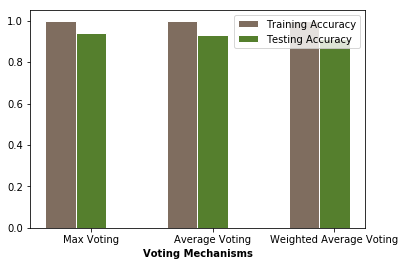

In [27]:
# Compare different voting mechanisms and their accuracies
barWidth = 0.25
bars1 = train
bars2 = test
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training Accuracy')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Testing Accuracy')
plt.xlabel('Voting Mechanisms',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Max Voting','Average Voting','Weighted Average Voting'])
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
# Max Voting
print(classification_report(y_test, t[np.argmax(scores)].predict(X_test.iloc[:,features[np.argmax(scores)]])))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        67
          1       0.94      0.94      0.94       126
          2       0.92      0.92      0.92        61

avg / total       0.94      0.94      0.94       254



In [30]:
# Average Voting
print(classification_report(y_test, avgvote_2))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93        67
          1       0.90      0.97      0.93       126
          2       0.95      0.90      0.92        61

avg / total       0.93      0.93      0.93       254



In [31]:
# Weighted Average Voting
print(classification_report(y_test, weightvote_2))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95        67
          1       0.85      0.98      0.91       126
          2       1.00      0.70      0.83        61

avg / total       0.92      0.91      0.90       254



In [32]:
# Compare the Random forest models with different number of trees N
score = []
for i in range(101):
    features = []
    t = []
    for j in range(i):
        num = list(np.random.choice(range(N),1)+1)
        feature = feat(num)
        features.append(feature)
        clf = DecisionTreeClassifier(random_state = 123)
        clf.fit(X_train.iloc[:,feature].values,y_train.values)
        t.append(clf)
    dic = zip(t,features)
    scores = []
    for tree,feature in dic:
        scores.append(tree.score(X_test.iloc[:,feature],y_test))
    score.append(scores)

In [33]:
score = score[1:]
score

[[0.9015748031496063],
 [0.9094488188976378, 0.8779527559055118],
 [0.9212598425196851, 0.7125984251968503, 0.8700787401574803],
 [0.8464566929133859,
  0.8346456692913385,
  0.9133858267716536,
  0.9015748031496063],
 [0.8110236220472441,
  0.8858267716535433,
  0.8779527559055118,
  0.8543307086614174,
  0.8385826771653543],
 [0.7677165354330708,
  0.8937007874015748,
  0.8700787401574803,
  0.6811023622047244,
  0.7559055118110236,
  0.8070866141732284],
 [0.8307086614173228,
  0.8582677165354331,
  0.6771653543307087,
  0.6062992125984252,
  0.8937007874015748,
  0.8976377952755905,
  0.8700787401574803],
 [0.8661417322834646,
  0.5590551181102362,
  0.8700787401574803,
  0.8582677165354331,
  0.8543307086614174,
  0.5748031496062992,
  0.8228346456692913,
  0.905511811023622],
 [0.8818897637795275,
  0.7047244094488189,
  0.8622047244094488,
  0.889763779527559,
  0.9173228346456693,
  0.5078740157480315,
  0.8464566929133859,
  0.8346456692913385,
  0.9094488188976378],
 [0.80314

In [34]:
max_scores = []
for i in range(len(score)):
    max_scores.append(max(score[i]))
max_scores

[0.9015748031496063,
 0.9094488188976378,
 0.9212598425196851,
 0.9133858267716536,
 0.8858267716535433,
 0.8937007874015748,
 0.8976377952755905,
 0.905511811023622,
 0.9173228346456693,
 0.9094488188976378,
 0.9251968503937008,
 0.9094488188976378,
 0.905511811023622,
 0.905511811023622,
 0.9291338582677166,
 0.9094488188976378,
 0.9251968503937008,
 0.9291338582677166,
 0.9173228346456693,
 0.9212598425196851,
 0.9330708661417323,
 0.9212598425196851,
 0.9094488188976378,
 0.9212598425196851,
 0.9291338582677166,
 0.9251968503937008,
 0.9330708661417323,
 0.9291338582677166,
 0.9330708661417323,
 0.9212598425196851,
 0.9133858267716536,
 0.9291338582677166,
 0.9212598425196851,
 0.9251968503937008,
 0.9173228346456693,
 0.9291338582677166,
 0.9212598425196851,
 0.9291338582677166,
 0.9212598425196851,
 0.9251968503937008,
 0.9251968503937008,
 0.9212598425196851,
 0.9212598425196851,
 0.9212598425196851,
 0.9291338582677166,
 0.9173228346456693,
 0.9251968503937008,
 0.9291338582677

In [35]:
print("Max Overall Accuracy: "+str(max(max_scores))+"; No. of Trees: "+str(max_scores.index(max(max_scores))+2))

Max Overall Accuracy: 0.9409448818897638; No. of Trees: 82


Text(0,0.5,'Test Accuracy')

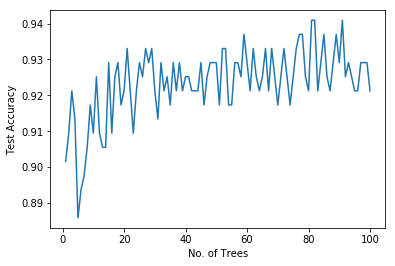

In [36]:
x = []
for i in range(len(max_scores)):
    x.append(i+1)
plt.plot(x, max_scores)
plt.xlabel("No. of Trees")
plt.ylabel("Test Accuracy")

In [47]:
# Compare different values for minimum number of features needed for individual trees
for j in range(1,X_train.shape[1]):
    features = []
    t = []
    for i in range(100):
        num = list(np.random.choice(range(N),1)+1)
        feature = j
        features.append(feature)
        clf = DecisionTreeClassifier(random_state = 123)
        clf.fit(X_train.iloc[:,feature].values,y_train.values)
        t.append(clf)
    dic = zip(t,features)
    scores = []
    for tree,feature in dic:
        scores.append(tree.score(X_test.iloc[:,feature],y_test))
    score.append(scores)

In [48]:
score = score[1:]
max_scores = []
for i in range(len(score)):
    max_scores.append(max(score[i]))

(0.8, 1.0)

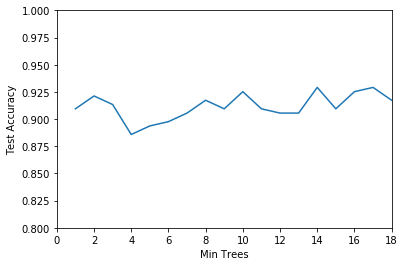

In [51]:
x = []
for i in range(len(max_scores)):
    x.append(i+1)
plt.plot(x, max_scores)
plt.xlabel("Min Trees")
plt.ylabel("Test Accuracy")
plt.xlim(0, 18)
plt.ylim(0.80, 1.0)

## Part 2: Random Forest using Sklearn

In [170]:
# Use the preprocessed dataset here
X = data.drop(['class'],axis = 1)
y = data['class']
print(X.shape, y.shape)

(846, 18) (846,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [172]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(592, 18) (592,)
(254, 18) (254,)


In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
# Train the Random Forest Model using builtin Sklearn Dataset
clf = RandomForestClassifier(max_depth=5,random_state=123,verbose=3)
clf.fit(X_train,y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=3, warm_start=False)

In [175]:
# Test the model with testing set and print the accuracy, precision, recall and f-measure
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.905511811023622


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [176]:
# Play with parameters such as
# number of decision trees
# Criterion for splitting
# Max depth
# Minimum samples per split and leaf
clf2 = RandomForestClassifier(200,verbose=3)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


0.9566929133858267

In [177]:
clf3 = RandomForestClassifier(500,min_samples_split=5,min_samples_leaf=2,verbose=3)
clf3.fit(X_train,y_train)
clf3.score(X_test,y_test)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500


building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


0.9448818897637795

In [178]:
clf4 = RandomForestClassifier(100,criterion='entropy',verbose=3)
clf4.fit(X_train,y_train)
clf4.score(X_test,y_test)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.952755905511811

In [179]:
clf5 = RandomForestClassifier(100,criterion='gini',verbose=3)
clf5.fit(X_train,y_train)
clf5.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9566929133858267

In [180]:
clf6 = RandomForestClassifier(200,criterion='gini',verbose=3)
clf6.fit(X_train,y_train)
clf6.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


0.952755905511811

In [181]:
clf7 = RandomForestClassifier(100,criterion='gini',max_depth=10,verbose=3)
clf7.fit(X_train,y_train)
clf7.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9488188976377953